<a href="https://colab.research.google.com/github/shehara123/asteroid/blob/main/finalproject_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download sameepvani/nasa-nearest-earth-objects
! unzip nasa-nearest-earth-objects

mkdir: cannot create directory ‘/root/.kaggle’: File exists
nasa-nearest-earth-objects.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  nasa-nearest-earth-objects.zip
replace neo.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace neo_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("neo.csv")
df.head()

id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20      False  
4               20.09       True

In [ ]:
dt = df.drop(['id','name','orbiting_body','sentry_object'],axis=1)
dt.shape

(90836, 6)

In [ ]:
training_data = dt.sample(frac=0.8, random_state=25)
testing_data = dt.drop(training_data.index)

In [ ]:
nw_train = training_data.loc[training_data['absolute_magnitude'] <=22.5 ]
nw_test = testing_data.loc[testing_data['absolute_magnitude'] <= 22.5]
print(nw_train.shape,nw_test.shape)

(27078, 6) (6772, 6)


In [ ]:
x_train = nw_train.drop(labels="hazardous", axis =1)
y_train = nw_train['hazardous']
x_test = nw_test.drop(labels="hazardous", axis =1)
y_test = nw_test['hazardous']

using absolute mangnitue instead of est_diameter_max

In [ ]:
pred =[]
for x in x_train['absolute_magnitude']:
  a = (63987799.135930546/x**6.035718866538284)-0.2033096901714229
  pred.append(a)

mean_squared_error(x_train['est_diameter_max'],pred)

0.024522231862121716

In [ ]:
predy =[]
for x in x_test['absolute_magnitude']:
  a = (63987799.135930546/x**6.035718866538284)-0.2033096901714229
  predy.append(a)


In [ ]:
x_train = x_train.drop(['est_diameter_max','est_diameter_min'],axis = 1)
x_test = x_test.drop(['est_diameter_max','est_diameter_min'],axis = 1)

In [ ]:
x_train['est_diameter_max'] = pred
x_test['est_diameter_max'] = predy

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({False: 20026, True: 7052})
Resample dataset shape Counter({False: 20026, True: 20026})


In [ ]:
x_smote['y'] = y_smote

(0.0, 4.0)

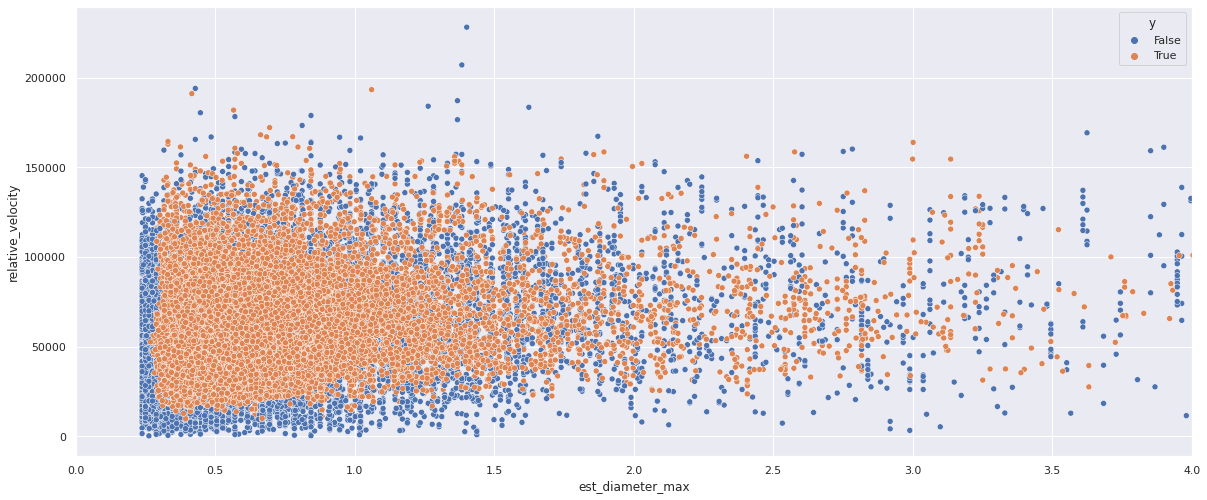

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.scatterplot(x="est_diameter_max", y="relative_velocity", hue='y', data=x_smote)
plt.xlim(0, 4)

(0.0, 5.0)

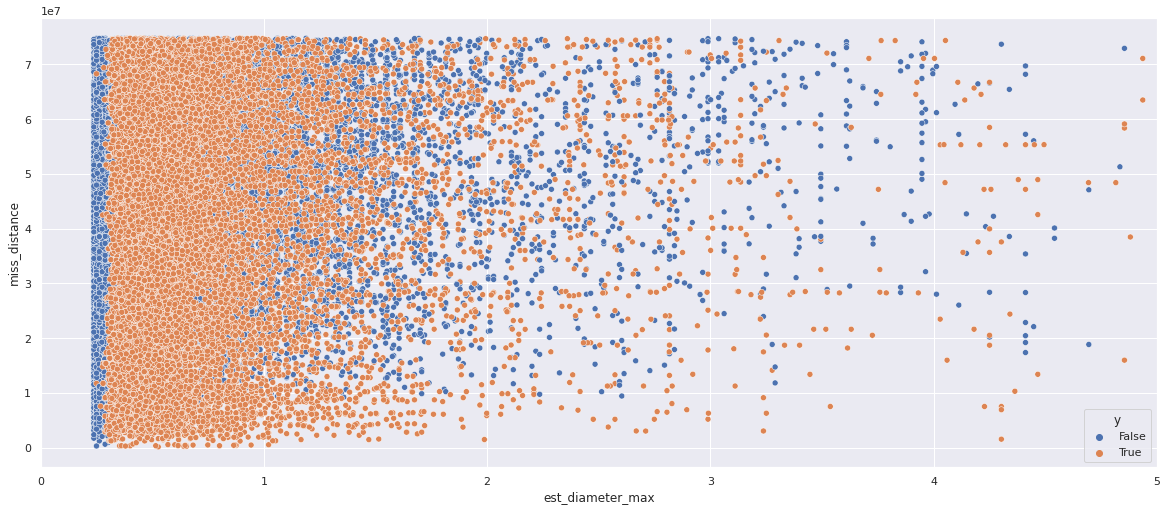

In [ ]:
sns.scatterplot(x="est_diameter_max", y="miss_distance", hue='y', data=x_smote)
plt.xlim(0, 5)

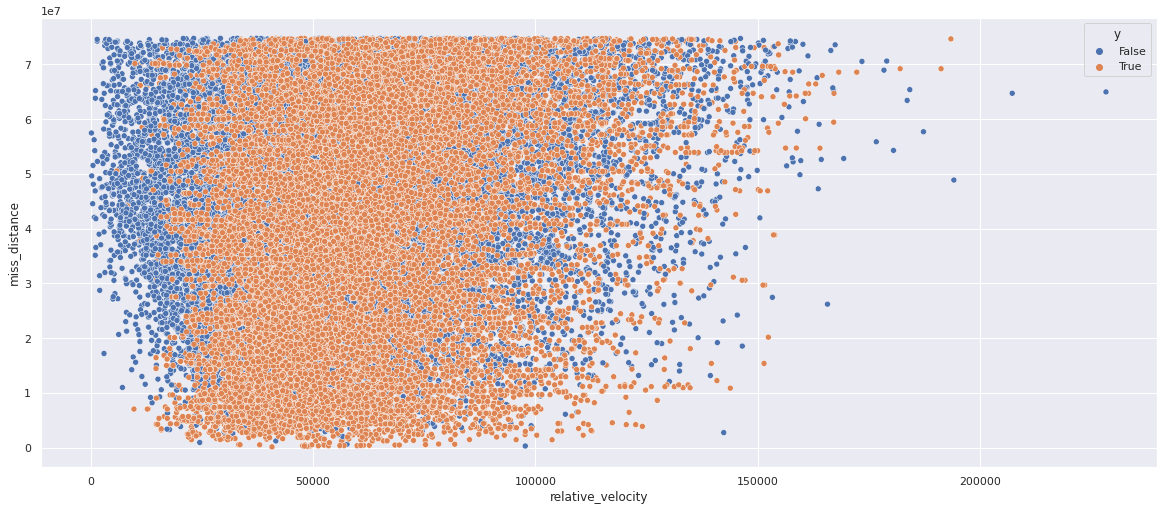

In [ ]:
sns.scatterplot(x="relative_velocity", y="miss_distance", hue='y', data=x_smote)

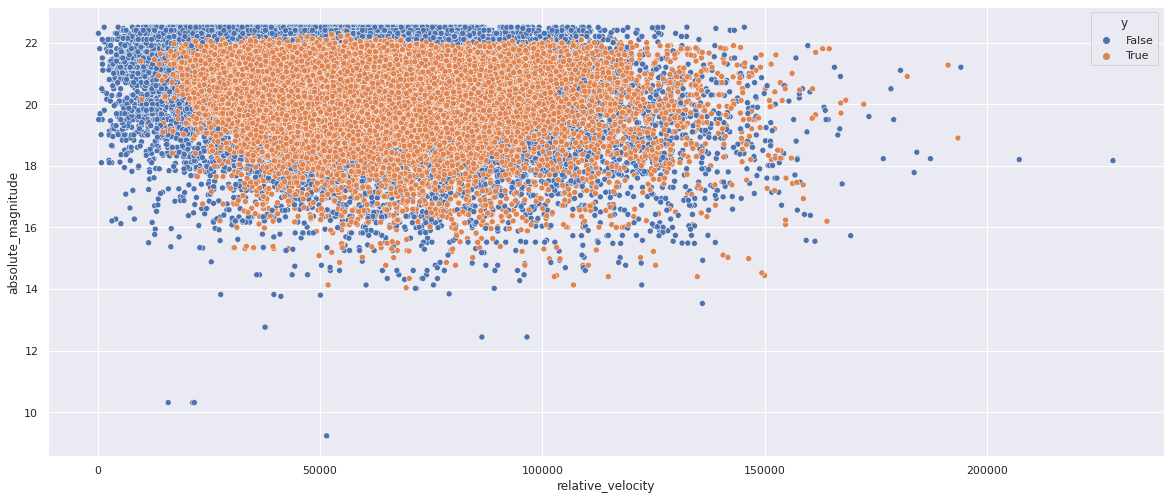

In [ ]:
sns.scatterplot(x="relative_velocity", y="absolute_magnitude", hue='y', data=x_smote)

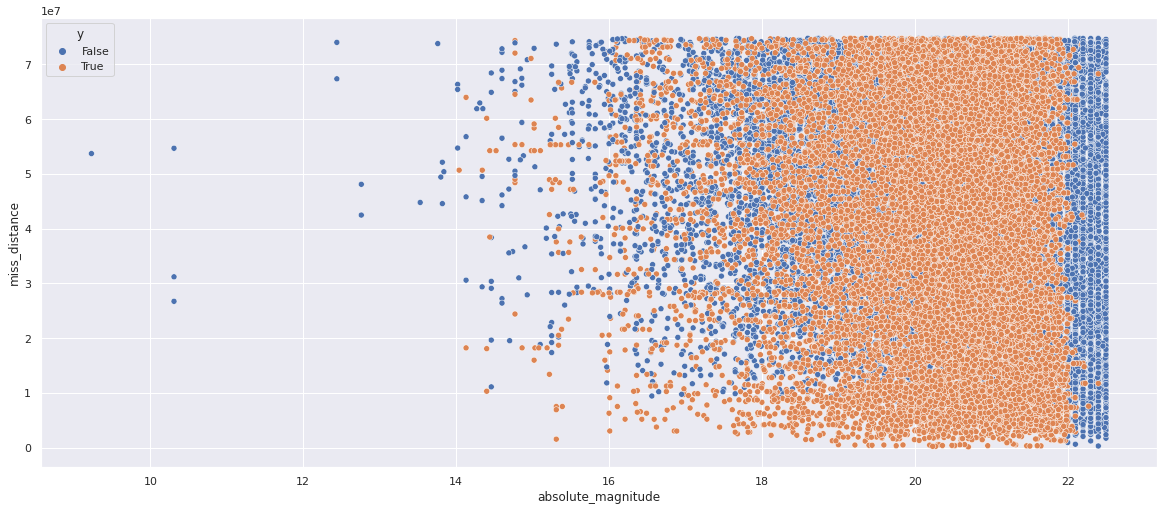

In [ ]:
sns.scatterplot(x="absolute_magnitude", y="miss_distance", hue='y', data=x_smote)

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
fig = px.scatter_3d(x_smote, x='relative_velocity', y='miss_distance', z='absolute_magnitude',
              color='y')
fig.show()

model building

In [ ]:
x_smote = x_smote.drop(['y'],axis =1)

standardizing train set

In [ ]:
#standardization 
from sklearn.preprocessing import StandardScaler
sclar = StandardScaler()

x_train = pd.DataFrame(sclar.fit_transform(x_train) ,columns = x_train.columns)
x_train.head()

relative_velocity  miss_distance  absolute_magnitude  est_diameter_max
0           1.374519       0.929940            0.294347         -0.228481
1          -0.678803       0.236174           -0.707970          0.167125
2           1.624529       1.513549           -0.774791          0.201744
3           0.026820       0.061782            0.615089         -0.317753
4           0.885568      -2.199136           -0.574328          0.101536

In [ ]:
x_train.head()

relative_velocity  miss_distance  absolute_magnitude  est_diameter_max
0           1.374519       0.929940            0.294347         -0.228481
1          -0.678803       0.236174           -0.707970          0.167125
2           1.624529       1.513549           -0.774791          0.201744
3           0.026820       0.061782            0.615089         -0.317753
4           0.885568      -2.199136           -0.574328          0.101536

In [ ]:
x_test = pd.DataFrame(sclar.transform(x_test) ,columns = x_test.columns)

In [ ]:
x_test.head()

relative_velocity  miss_distance  absolute_magnitude  est_diameter_max
0           1.804659       1.243142            0.661864         -0.329626
1          -0.486342       1.041684            0.120612         -0.173774
2           0.093758      -1.291057            0.027063         -0.142250
3          -0.480458       0.668832            0.361169         -0.248276
4          -0.930409       1.432743            0.361169         -0.248276

logistic on original data set

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {"penalty":["none","l1","l2","elasticnet"],
          "C": np.logspace(-5,5,20),
          "solver":["liblinear","sag","saga","lbfgs","newton-cg"],
          "max_iter": [10,100,1000,10000,100000]
    }
model = LogisticRegression(random_state=0)
clf = GridSearchCV(model, param_grid = params, cv = 5, n_jobs=-1)
clf.fit(x_train,y_train)
best_params = clf.best_params_
best_model = LogisticRegression(**best_params)
best_model.fit(x_train, y_train)



In [ ]:
#logistic model performance 
log_pred = best_model.predict(x_train)
test_pred = best_model.predict(x_test)

#confusion_matrix = metrics.confusion_matrix(y_train, log_pred)
print("accuracy of logistic on train",metrics.accuracy_score(y_train, log_pred))
print("accuracy of logistic on train",metrics.accuracy_score(y_test, test_pred))

accuracy of logistic on train 0.7425585346037373
accuracy of logistic on train 0.7383343177790904


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Calculating errors
train_error= []
test_error= []

for k in range(1, 10):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_pred1= knn.predict(x_train)
    train_error.append(np.mean(y_train!=y_pred1))

    y_pred2= knn.predict(x_test)
    test_error.append(np.mean(y_test!=y_pred2))


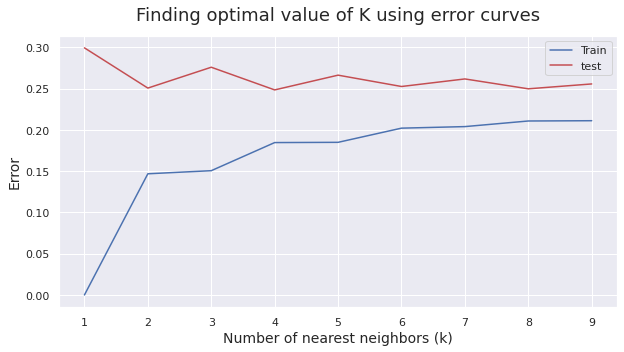

In [ ]:
# Plotting error curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), train_error, color='b', label="Train")
plt.plot(range(1, 10), test_error, color='r', label="test")
plt.xlabel('Number of nearest neighbors (k)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Finding optimal value of K using error curves', fontsize=18, pad=15)
plt.legend()
plt.show()

In [ ]:
# Instantiate the KNN class 
knn= KNeighborsClassifier(n_neighbors=7)

# Fitting the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#knn model performance 
knn_pred = knn.predict(x_train)
knn_valid = knn.predict(x_test)
#confusion_matrix = metrics.confusion_matrix(y_train, log_pred)
print("accuracy of knn on train",metrics.accuracy_score(y_train, knn_pred))
print("accuracy of knn on validation",metrics.accuracy_score(y_test, knn_valid))

accuracy of knn on train 0.7960706108279785
accuracy of knn on validation 0.7383343177790904


LDA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#find best solver

# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


Mean Accuracy: 0.742
Config: {'solver': 'svd'}


In [ ]:
#selecting best shrinkage
from numpy import arange
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.742
Config: {'shrinkage': 0.0}


QDA

In [ ]:
#Fit the QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
#QDA model performance 
qda_pred = model.predict(x_train)
qda_valid = model.predict(x_test)
#confusion_matrix = metrics.confusion_matrix(y_train, log_pred)
print("accuracy of QDA on train",metrics.accuracy_score(y_train, qda_pred))
print("accuracy of QDA on validation",metrics.accuracy_score(y_test, qda_valid))

accuracy of QDA on train 0.6019277642366497
accuracy of QDA on validation 0.6070584760779681


random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)
print("accuracy of rf on train",metrics.accuracy_score(y_train, train_pred))
print("accuracy of rf on test",metrics.accuracy_score(y_test, test_pred))

accuracy of rf on train 0.9999261393012778
accuracy of rf on test 0.7762847017129356


In [ ]:
cm = confusion_matrix(y_test, test_pred)

# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

Predicted Negative  Predicted Positive
Actual Negative                4564                 420
Actual Positive                1095                 693

In [ ]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [ ]:
confusion_metrics(cm)

True Positives: 693
True Negatives: 4564
False Positives: 420
False Negatives: 1095
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.39
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.54


In [ ]:
train_pred

array([False, False,  True, ...,  True,  True, False])

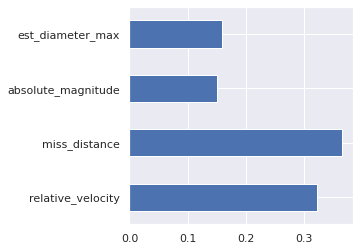

In [ ]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
(pd.Series(rf.feature_importances_, index=x_train.columns).plot(kind='barh'))
plt.show()

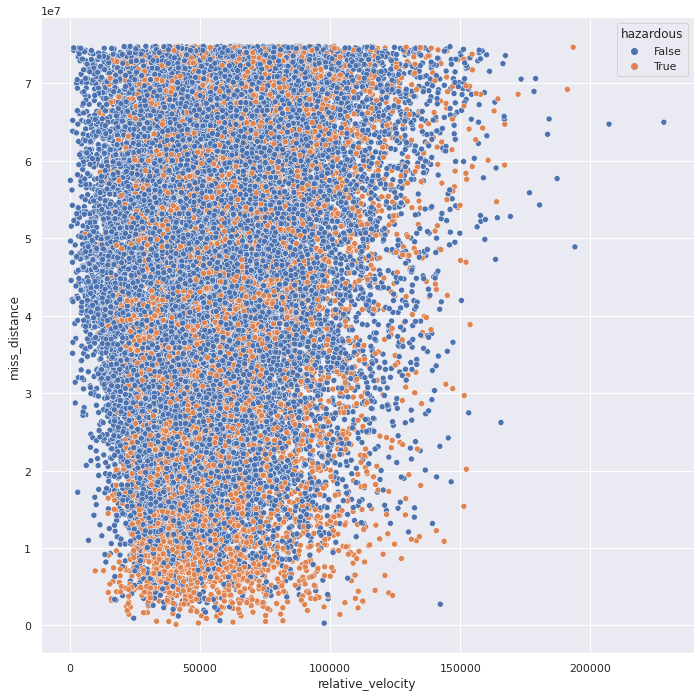

In [ ]:
sns.set(rc={'figure.figsize':(11.7,11.7)})
sns.scatterplot(x="relative_velocity", y="miss_distance", hue='hazardous', data=nw_train)


In [ ]:
nw_test.head()

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
29          0.136319          0.304818      109370.376172   6.823170e+07   
49          0.197950          0.442629       45273.275408   6.441754e+07   
50          0.211132          0.472106       61503.174838   2.025234e+07   
57          0.167708          0.375008       45437.902447   5.735844e+07   
69          0.167708          0.375008       32849.271838   7.182136e+07   

    absolute_magnitude  hazardous  
29               21.45      False  
49               20.64      False  
50               20.50       True  
57               21.00      False  
69               21.00      False

In [ ]:
nw_test1 = nw_test.loc[nw_test['miss_distance'] <= 1.5e+07 ]
x_test1 = nw_test1.drop(labels="hazardous", axis =1)
y_test1 = nw_test1['hazardous']

x_test1.shape

(537, 5)

In [ ]:
pred =[]
for x in x_test1['absolute_magnitude']:
  a = (63987799.135930546/x**6.035718866538284)-0.2033096901714229
  pred.append(a)

x_test1 = x_test1.drop(['est_diameter_max','est_diameter_min'],axis = 1)
x_test1['est_diameter_max'] = pred
x_test1.shape

(537, 4)

In [ ]:
x_test1 = pd.DataFrame(sclar.transform(x_test1) ,columns = x_test1.columns)
x_test1

relative_velocity  miss_distance  absolute_magnitude  est_diameter_max
0            -1.160338      -2.214095           -0.153354         -0.076995
1            -0.325756      -1.594480            0.561632         -0.303845
2            -0.806351      -2.271158            1.229844         -0.454216
3            -1.218634      -2.058471           -0.975255          0.313535
4             0.939791      -2.101924           -0.039758         -0.118788
..                 ...            ...                 ...               ...
532          -0.775934      -1.582391            1.009334         -0.409839
533          -0.876467      -1.623971           -0.948526          0.297907
534          -0.649098      -2.059120           -0.841612          0.237648
535          -0.005254      -2.020930            1.029380         -0.414069
536          -1.047312      -2.057490           -0.013030         -0.128270

[537 rows x 4 columns]

In [ ]:
test1_pred = knn.predict(x_test1)
print("accuracy of rf on test",metrics.accuracy_score(y_test1, test1_pred))

accuracy of rf on test 0.750465549348231
